### Classification Trees are an exceptionally useful machine learning method one need to know how the decisions are being made.
#### For example one have to jutify predictions , classification trees are a good method, because each step in the decsion making process is easy to understand

In [1]:
import pandas as pd # to load and manipulate data
import numpy as np # to calculate mean and standard deviation
import matplotlib.pyplot as plt #to draw graphs
from sklearn.tree import DecisionTreeClassifier #to build a classification tree
from sklearn.tree import plot_tree #to draw a classification tree
from sklearn.model_selection import train_test_split #to split data into train and test
from sklearn.metrics import confusion_matrix #to create confusion matrix
from sklearn.metrics import plot_confusion_matrix #to draw a confusion matrix
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv("processed.cleveland.data",header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


###### Since column names are numbers let's repalce it with :

- age
- sex
- cp - chest pain
- restbp -resting blood pressure(in mm Hg)
- chol serum cholestrol in mg/dl
- fbs fasting blodd sugar
- restecg, resting electrocardiogrpahic results
- thalach, maximum heart rate achieved
- exang, excerise induced angina
- oldpeak, ST depression induced by excercise relative to rest
- slope, the slope of the peak exercise ST segment
- ca, number of major vessels(0-3) coloured by fluoroscopy
- thal, this the short of thalium heart scan
- hd, diagnosis of hear disease, the predicted attribute

In [4]:
## assigning column names

df.columns=["age","sex","cp","restbp","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","hd"]

In [5]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
#Identifying missing data

In [7]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

Object datatypes are used when there are mixtures of things, like a mixture of numbers and letter, in theory both ca and thal should have a few a values representing different categories.

In [8]:
df["ca"].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [9]:
df["thal"].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [10]:
print(len(df.loc[(df["ca"]=="?")|(df["thal"]=="?")]))

6


#### Since only 6 rows have missing values, let's look at them

In [11]:
df.loc[(df["ca"]=="?")|(df["thal"]=="?")]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


Now let's count the number of rows in full dataset

In [12]:
len(df)

303

### Out of 303 only 6 have "?" marks so we can remove those with question marks and can go ahead with 297 data to build Decision Tree

In [13]:
df_no_missing=df.loc[(df["ca"]!="?")&(df["thal"]!="?")]

In [14]:
df_no_missing["ca"].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [15]:
df_no_missing["thal"].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [16]:
x=df_no_missing.drop("hd",axis=1).copy()

In [17]:
x

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [18]:
y=df_no_missing["hd"].copy()

In [19]:
y

0      0
1      2
2      1
3      0
4      0
      ..
297    1
298    1
299    2
300    3
301    1
Name: hd, Length: 297, dtype: int64

In [20]:
x.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [21]:
pd.get_dummies(x,columns=["cp"]).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [22]:
x_encoded=pd.get_dummies(x,columns=["cp","restecg","slope","thal"])

In [23]:
x_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [24]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In this tutorial we're only makeing a tree that does simple classification and only care if someone has heart disease or not, so we need to convert all numbers >0 to 1

In [25]:
y_not_zero_index= y>0 # get the index for each non-zero value in y
y[y_not_zero_index]=1
y.unique()

array([0, 1], dtype=int64)

In [26]:
X_train,X_test,y_train,y_test=train_test_split(x_encoded,y,random_state=42)
clf_dt=DecisionTreeClassifier (random_state=42)
clf_dt=clf_dt.fit(X_train,y_train)

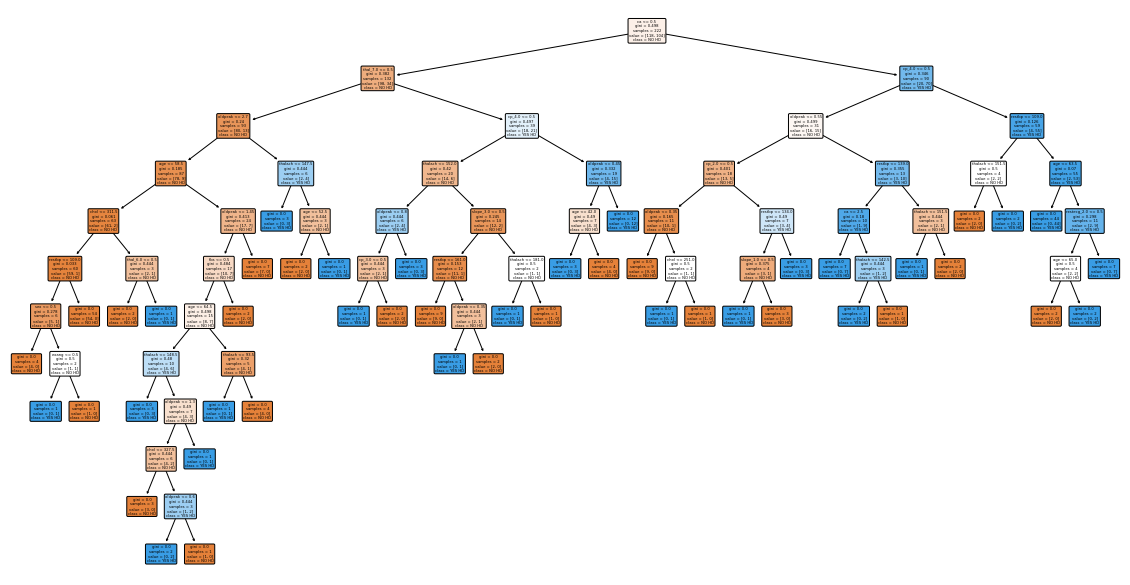

In [27]:
plt.figure(figsize=(20,10.5))
plot_tree(clf_dt,filled=True,rounded=True,
         class_names=["NO HD","YES HD"],
         feature_names=x_encoded.columns)
plt.show()

In [28]:
x_encoded

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,0,...,1,1,0,0,0,1,0,0,0,1
298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,1,...,0,1,0,0,0,1,0,0,0,1
299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,0,...,1,1,0,0,0,1,0,0,0,1
300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,0,...,1,1,0,0,0,1,0,0,0,1


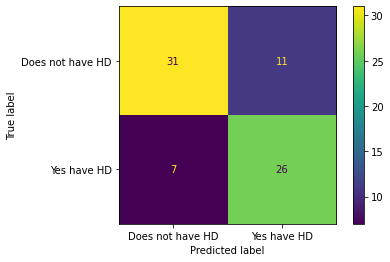

In [29]:
## plot_confusion_matrix() will run the test data down the tree and draw
plot_confusion_matrix(clf_dt,X_test,y_test,display_labels=["Does not have HD","Yes have HD"])

From confusion matrix we can see that 31+11=42 people that did not have Heart Disease, 31(74%) were correctly classified. And of the 7+26=33 people that have Heart Disease, 26(79%) were correctly classified.

We can do pruning to get better results and also pruning helps to avoid overfitting

 First we need to make preliminary tree and form a confusion matrix and then we have to optimize it.


#### Cost Complexity Pruning Part 1: Visualize alpha

Decision trees can have overfitting easily, to reduce overfitting pruning can be used.There are lot of parameters like max_depth,min_samples that are designed to reduce overfitting.

However pruning a tree with cost complexity pruning can simplify the whole process of finding a smaller tree that improves accuracy with testing data set.

Pruning a decision tree is all about finding the right value for the pruning parameter alpha, which controls how little or how much pruning happens. One way to find optimial value for alpha is to plot the accuracy of the tree as a function of different values. We'll do this for both the training dataset and testing dataset.

First let's extract the different values of alpha that are available for this tree and build a pruned tree for each value for alpha.

**Note : We omit the maximum value for alpha with ccp_alphas=ccp_alpha[:-1] because it would prune all leaves, leaving us with only a root instead of a tree.**

In [30]:
path=clf_dt.cost_complexity_pruning_path(X_train,y_train) #determine values for alpha
ccp_alphas=path.ccp_alphas # extract different values for alpha
ccp_alphas=ccp_alphas[:-1]#exclude the maximum value for alphas

clf_dts=[] #create an array that we will put decision tree into

## now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=42,ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train,y_train)
    clf_dts.append(clf_dt)

Now let's gaph the accuracy of the trees using the Training Dataset and Testing Dataset as the function of alpha

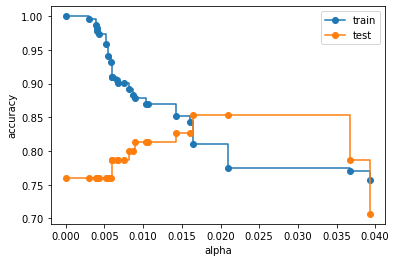

In [31]:
train_scores=[clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
test_scores=[clf_dt.score(X_test,y_test) for clf_dt in clf_dts]

fig,ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_label("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas,train_scores,marker="o",label="train",drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker="o",label="test",drawstyle="steps-post")
ax.legend()
plt.show()

Accuracy for testing datset hits maximum when value of alpha is 0.016
**Note**:When we apply Cost complexity pruning to a classification tree, values for alpha go from 0 to 1, because gini scores go from 0 to 1. In contrat values for alpha for a regression tree can be much larger since the sum of squared residuals can in theory go from 0 to positive infinity.


Since we could have divided training and testing dataset in many ways, how do we know we used best training data and hwo do we know we sued the best testing data set, typically to answer this we sue 10-fold cross validation and we'll do it with cross_val_score() function.

###### Cost complexity pruning part 2: Cross validation for finding the Best Alpha
    
The graph we just drew suggested one value for alpha, 0.016 but another set of data might suggest another optimal value.

First let's demonstrate that different training and testing datsets result in trees with different accuracies when we set ccp_alpha =0.016


<AxesSubplot:xlabel='tree'>

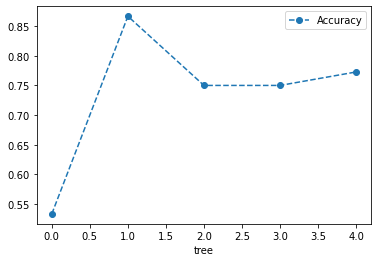

In [32]:
clf_dt=DecisionTreeClassifier(random_state=42,ccp_alpha=0.016) #create teh tree with ccp_alpha=0.016

#now use 5-fold cross validation create 5 different traingin and testing datasets that
## are then used to train and test the tree

##Note: We use 5-fold because we don't have tons of data

scores= cross_val_score(clf_dt,X_train,y_train,cv=5)

df=pd.DataFrame(data={"tree":range(5),"Accuracy":scores})

df.plot(x="tree",y="Accuracy",marker="o",linestyle="--")

The graph above shows that using differnt testing and trainign data with same alpha resulted in different accuracies, suggesting that alpha is sensitive to the datasets. So instead of picking a single Training dataset and single Testing dataseet, let's use cross valdiation to find the optimal value of ccp_alpha.

In [33]:
## Create an array to store the results of each fold during cross validation

alpha_loop_values=[]

## For each candidate value for alpha we will run 5-fold cross validation
## Then we will store the mean and standard deviation of the scores for each call
## to cross_val_Score in alpha_loop_values...

for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=42,ccp_alpha=ccp_alpha)
    scores=cross_val_score(clf_dt,X_train,y_train,cv=5)
    alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
    

## Now we can draw a graph of the means and standard deviations of teh scores
## fro each cnadidate value for alpha


alpha_results=pd.DataFrame(alpha_loop_values,columns=["alpha","Mean_accuracy","std"])

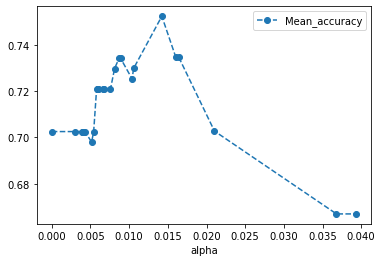

In [34]:
alpha_results.plot(x="alpha",y="Mean_accuracy",marker="o",linestyle="--")
plt.show()

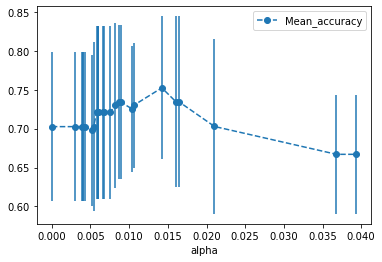

In [35]:
alpha_results.plot(x="alpha",y="Mean_accuracy",yerr="std",marker="o",linestyle="--")
plt.show()

Now we can see that alpha value should be something near to 0.014

In [36]:
alpha_results[(alpha_results["alpha"]>0.014)& (alpha_results["alpha"]<0.015)]["alpha"]

20    0.014225
Name: alpha, dtype: float64

In [37]:
ideal_ccp_alpha=alpha_results[(alpha_results["alpha"]>0.014)& (alpha_results["alpha"]<0.015)]["alpha"]

In [38]:
#converting from series to float
ideal_ccp_alpha=float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

In [39]:
## We can also find the ideal value of alpha using Gridsearch cv

In [40]:
clf_dt_pruned=DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.014224751066856332, random_state=42)

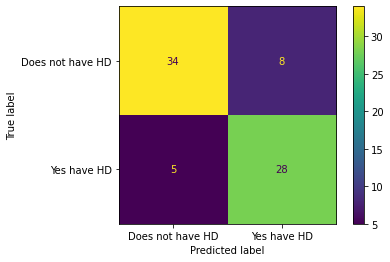

In [41]:
plot_confusion_matrix(clf_dt_pruned,X_test,y_test,display_labels=["Does not have HD","Yes have HD"])

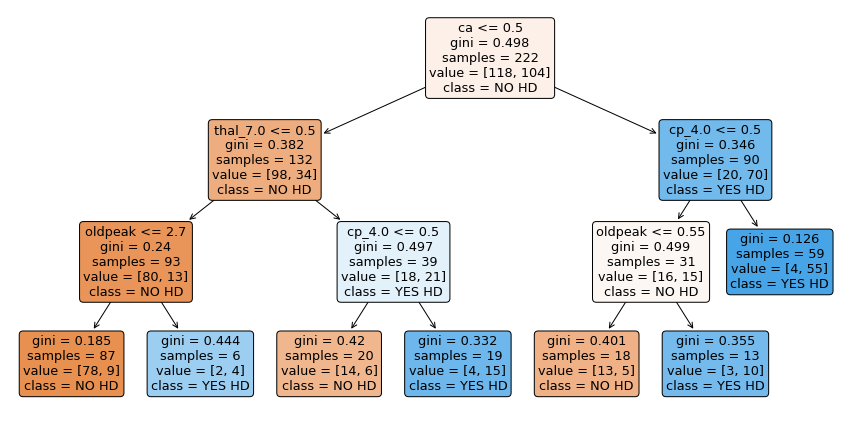

In [43]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,filled=True,rounded=True,class_names=["NO HD","YES HD"],
         feature_names=x_encoded.columns)
plt.show()